In [1]:
import functions as fn 
import adjacency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from colour_palette import _COLOUR_PALETTE
import pandas as pd

# Cutoff 6 A

In [64]:
mean_0 = np.mean(shadow_s_0) 
mean = np.mean(histogram_pdb)
print(mean_0)
print(mean)
std_0 = np.std(shadow_s_0) 
std = np.std(histogram_pdb)
print(std_0)
print(std)

7.034010095561567
8.439779666922126
23.869431827665956
50.46999466806038


1.0
1.0


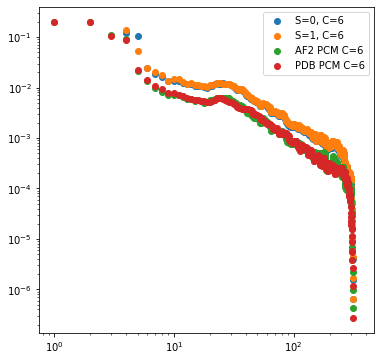

In [67]:
shadow_s_0 = np.load("../data/alphafold/shadow_distance_histogram_not_normed_s_0_c_6.npy", allow_pickle=True)
shadow_s_1 = np.load("../data/alphafold/maybe_wrong_shadow_maps/shadow_distance_histogram_not_normed_s_1_c_6.npy", allow_pickle=True)
histogram_af = np.load("../data/alphafold/histogram_300_not_normed.npy", allow_pickle=True)
histogram_pdb = np.load("../data/rcsb/histogram_300_not_normed.npy", allow_pickle=True)

bins = np.linspace(1, 350, 350)[:-1]
mean_0 = np.mean(shadow_s_0, axis=0) 
mean_1 = np.mean(shadow_s_1, axis=0)
mean_af = np.mean(histogram_af, axis=0)
mean_pdb = np.mean(histogram_pdb, axis=0)

distances_0 = mean_0 / np.sum(mean_0)
distances_1 = mean_1 / np.sum(mean_1)
distances_af = mean_af / np.sum(mean_af)
distances_pdb = mean_pdb / np.sum(mean_pdb)

plt.figure(figsize=(6,6))
plt.scatter(bins, distances_0, label="S=0, C=6")
plt.scatter(bins, distances_1, label="S=1, C=6")
plt.scatter(bins, distances_af, label="AF2 PCM C=6")
plt.scatter(bins, distances_pdb, label="PDB PCM C=6")
plt.legend()
plt.xscale("log")
plt.yscale("log")

# plt.xlim(4, 150)
# plt.ylim(0.0005, 0.1)
print(np.sum(distances_0))
print(np.sum(distances_pdb))

In [43]:
distances_0[4]

0.1048950948373632

In [32]:
np.sum(distances_af)

0.9999999999999999

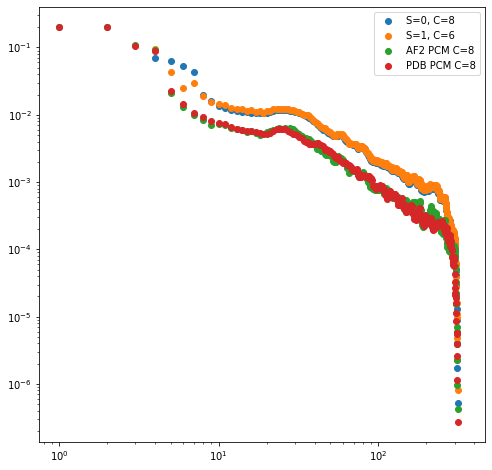

In [69]:
shadow_s_0 = np.load("../data/alphafold/shadow_distance_histogram_not_normed_s_0_c_8.npy", allow_pickle=True)
shadow_s_1 = np.load("../data/alphafold/shadow_distance_histogram_not_normed_s_1_c_8.npy", allow_pickle=True)
histogram_af = np.load("../data/alphafold/histogram_300_not_normed.npy", allow_pickle=True)
histogram_pdb = np.load("../data/rcsb/histogram_300_not_normed.npy", allow_pickle=True)

bins = np.linspace(1, 350, 350)[:-1]
mean_0 = np.mean(shadow_s_0, axis=0) 
mean_1 = np.mean(shadow_s_1, axis=0)
mean_af = np.mean(histogram_af, axis=0)
mean_pdb = np.mean(histogram_pdb, axis=0)

distances_0 = mean_0 / np.sum(mean_0)
distances_1 = mean_1 / np.sum(mean_1)
distances_af = mean_af / np.sum(mean_af)
distances_pdb = mean_pdb / np.sum(mean_pdb)

plt.figure(figsize=(8,8))
plt.scatter(bins, distances_0, label="S=0, C=8")
plt.scatter(bins, distances_1, label="S=1, C=6")
plt.scatter(bins, distances_af, label="AF2 PCM C=8")
plt.scatter(bins, distances_pdb, label="PDB PCM C=8")
plt.legend()
plt.xscale("log")
plt.yscale("log")

# plt.xlim(4, 200)
# plt.ylim(0.0005, 0.1)

In [2]:

af2_file = "/home/jguven/projects/amino_acid_distance_distributions/shadow_map/AF-Q9PPK3-F1-model_v4.pdb"

/home/jguven/Software/miniconda3/lib/python3.10/site-packages/MDAnalysis/coordinates/PDB.py:431: UserWarning: 1 A^3 CRYST1 record, this is usually a placeholder. Unit cell dimensions will be set to None.
  warnings.warn("1 A^3 CRYST1 record,"


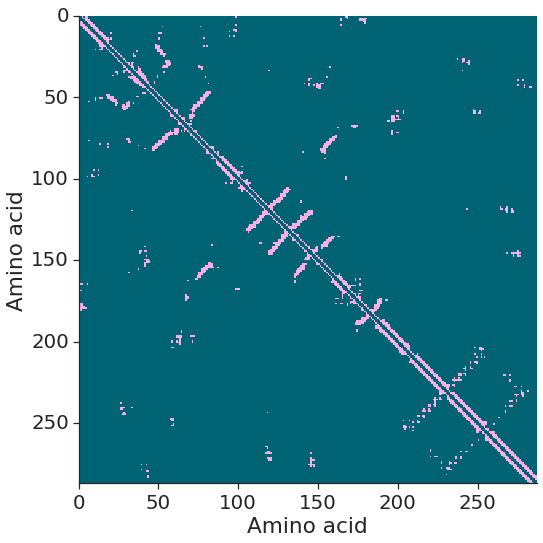

In [3]:
af2_matrix = adjacency.get_pdb_matrix(af2_file)
adjacency_matrix = af2_matrix.copy()
np.fill_diagonal(adjacency_matrix, 0)
np.fill_diagonal(adjacency_matrix[1:], 0)
np.fill_diagonal(adjacency_matrix[:,1:], 0)

plt.figure(figsize=(8, 8))
sns.set(context="notebook", palette="colorblind", style="ticks", font_scale=1.8)
colormap = [_COLOUR_PALETTE["NO_CONTACT"], _COLOUR_PALETTE["CONTACT"]]
heatmap = sns.heatmap(adjacency_matrix, cmap=colormap, cbar=False)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(adjacency_matrix[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()

In [4]:
af2_matrix.shape

(287, 287)

In [3]:
template = np.zeros(shape=[204, 204])




In [5]:
template = np.zeros(shape=[287, 287])
shadow_file = pd.read_csv("/home/jguven/projects/amino_acid_distance_distributions/shadow_map/AF-Q9PPK3-F1-model_v4_contacts", header=None, sep=" ", names=["x1", "r1", "x2", "r2", "d"])
shadow_file.head()
rows = shadow_file["r1"].to_numpy() - 1
columns = shadow_file["r2"].to_numpy() - 1

for i, j in zip(rows, columns):
    template[i, j] = 1
    template[j, i] = 1
    # print(i, j)


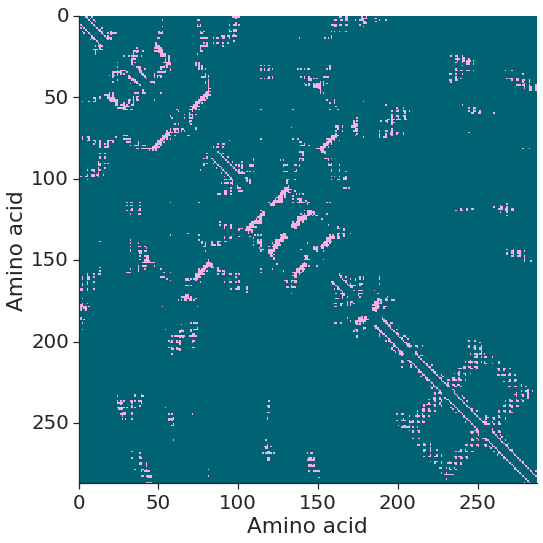

In [6]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(template, cmap=colormap, cbar=False)
np.fill_diagonal(adjacency_matrix, 0)
np.fill_diagonal(adjacency_matrix[1:], 0)
np.fill_diagonal(adjacency_matrix[:,1:], 0)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(template[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()

In [8]:
# contact map from their method
template = np.zeros(shape=[204, 204])
contact_file = pd.read_csv("/home/jguven/projects/amino_acid_distance_distributions/contact_map/contacts_out", header=None, sep=" ", names=["x1", "r1", "x2", "r2", "d"])

rows = contact_file["r1"].to_numpy() - 1
columns = contact_file["r2"].to_numpy() - 1

for i, j in zip(rows, columns):
    template[i, j] = 1
    template[j, i] = 1

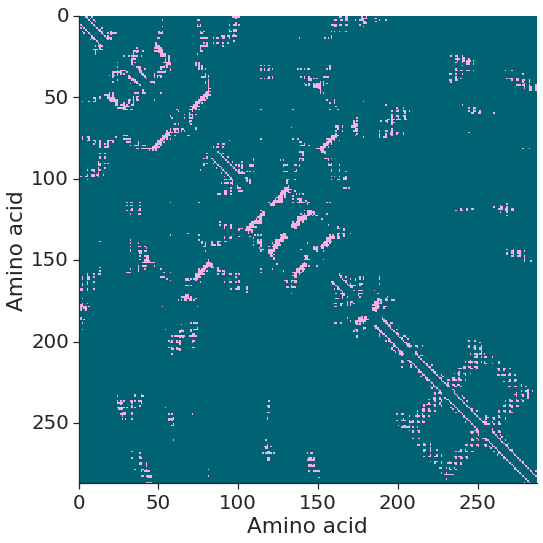

In [8]:
plt.figure(figsize=(8, 8))
heatmap = sns.heatmap(template, cmap=colormap, cbar=False)
# np.fill_diagonal(adjacency_matrix, 0)
# np.fill_diagonal(adjacency_matrix[1:], 0)
# np.fill_diagonal(adjacency_matrix[:,1:], 0)
# set_adjacency_matrix_ticks(heatmap)
heatmap.set_xlabel("Amino acid")
heatmap.set_ylabel("Amino acid")
sns.despine()
ticks = np.arange(0, len(template[0]), 50)
plt.xticks(ticks, ticks, rotation=360)
plt.yticks(ticks, ticks)
plt.tight_layout()
plt.savefig("../plots/individual_plots_for_paper/scm_af.jpeg", dpi=900)
